In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from time import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import tensorflow_decision_forests as tfdf

NotFoundError: c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow_decision_forests\tensorflow\ops\inference\inference.so not found

In [118]:
train_data = pd.read_csv('/kaggle/input/finaldataset/patients_dataset.csv')
test_data = pd.read_csv('/kaggle/input/finaldataset/newdataset.csv')

In [119]:
train_data.head()

,Name,Age,Gender,Address,Contact_Number,Disease,Symptom,Time_Period,Med_Taken,Doctor_Consulted
0,Frank Brown,86,Male,"Philadelphia, USA",3088873289,Depression,"Dizziness, Joint pain, Insomnia",19,Amoxicillin,False
1,Bob Davis,25,Female,"Dallas, USA",4998342330,Pneumonia,"Fatigue, Cough, Fever, Rash",25,Albuterol,True
2,Alice Jones,70,Female,"Houston, USA",9489320060,Diabetes,"Cough, Rash",4,Ibuprofen,False
3,David Wilson,64,Male,"Chicago, USA",6150083650,Asthma,"Dizziness, Fever, Rash, Fatigue, Insomnia",3,Azithromycin,False
4,Frank Williams,52,Male,"Phoenix, USA",3428135523,Hypertension,"Fatigue, Fever, Nausea, Headache, Cough",7,Albuterol,True


In [124]:
#First checking for duplicate and null values:

print(train_data[train_data.duplicated() == True])
#as we can see here, we have no duplicated rows

print(train_data.isnull().sum())
#as we can see here, we have no null value inside any column


Empty DataFrame
Columns: [Name, Age, Gender, Address, Contact_Number, Disease, Symptom, Time_Period, Med_Taken, Doctor_Consulted]
Index: []
Name                0
Age                 0
Gender              0
Address             0
Contact_Number      0
Disease             0
Symptom             0
Time_Period         0
Med_Taken           0
Doctor_Consulted    0
dtype: int64


In [125]:
print(train_data.dtypes)

Name                object
Age                  int64
Gender              object
Address             object
Contact_Number       int64
Disease             object
Symptom             object
Time_Period          int64
Med_Taken           object
Doctor_Consulted      bool
dtype: object


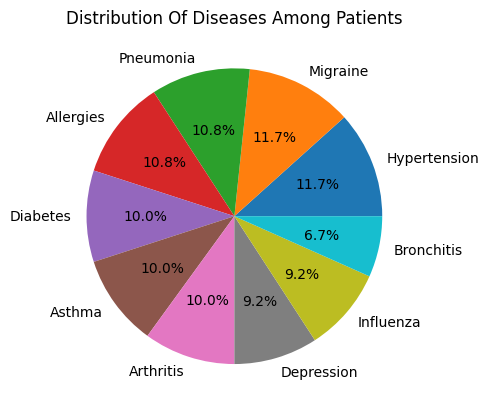

In [126]:
data = train_data['Disease'].value_counts()

plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title("Distribution Of Diseases Among Patients")
plt.show()

In [123]:
train_data.describe()

,Age,Contact_Number,Time_Period
count,120.000000,1.200000e+02,120.000000
mean,52.966667,4.916689e+09,16.450000
std,20.849978,3.027888e+09,8.273528
min,18.000000,4.790036e+07,1.000000
25%,35.000000,2.527215e+09,9.000000
50%,53.000000,4.749519e+09,18.000000
75%,70.000000,7.596674e+09,23.000000
max,90.000000,9.879482e+09,30.000000


In [127]:
train_data.shape

(120, 10)

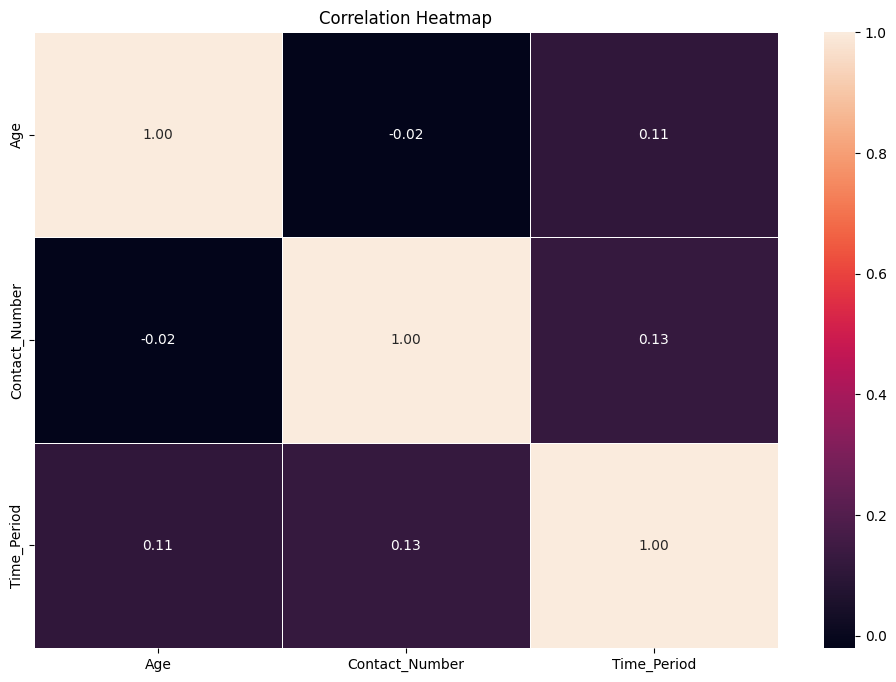

In [128]:
# Drop non-numeric columns
numeric_data = train_data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

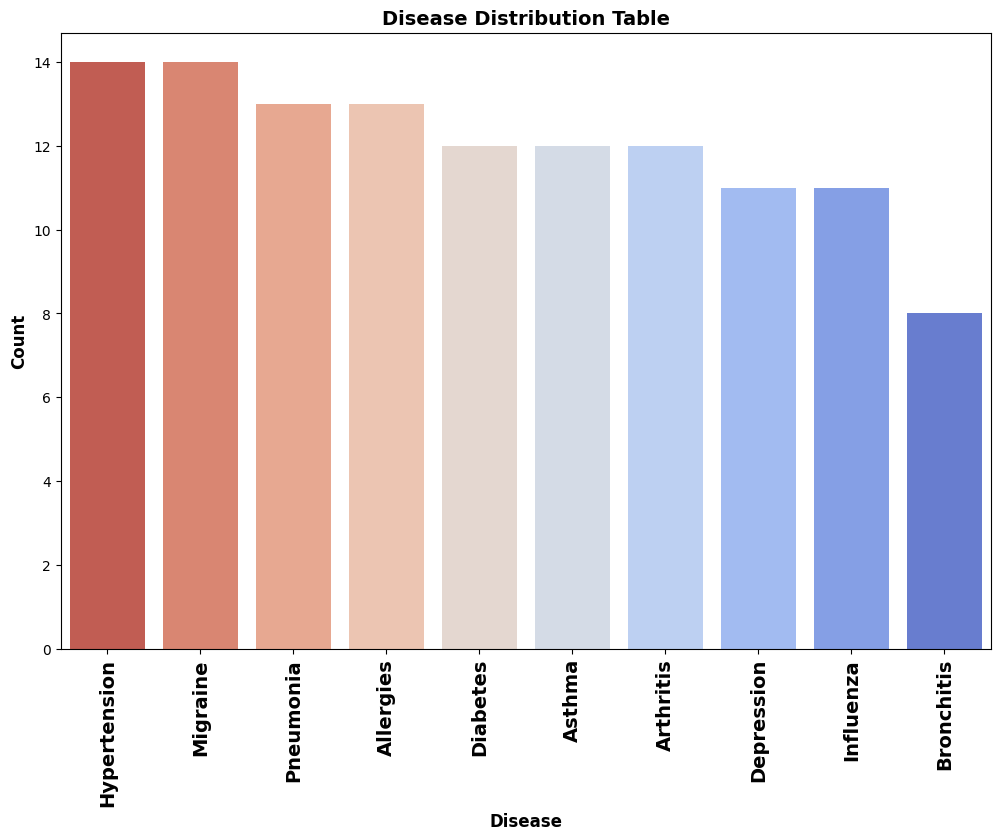

In [129]:
plt.figure(figsize=(12, 8))
counts = train_data['Disease'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='coolwarm_r')
plt.xlabel('Disease', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12,  fontweight='bold' )
plt.title('Disease Distribution Table', fontsize=14, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

<Axes: >

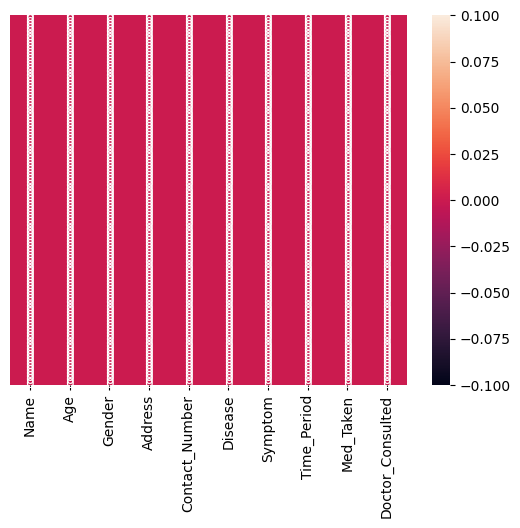

In [130]:
sns.heatmap(train_data.isnull(), yticklabels=False, annot=True)

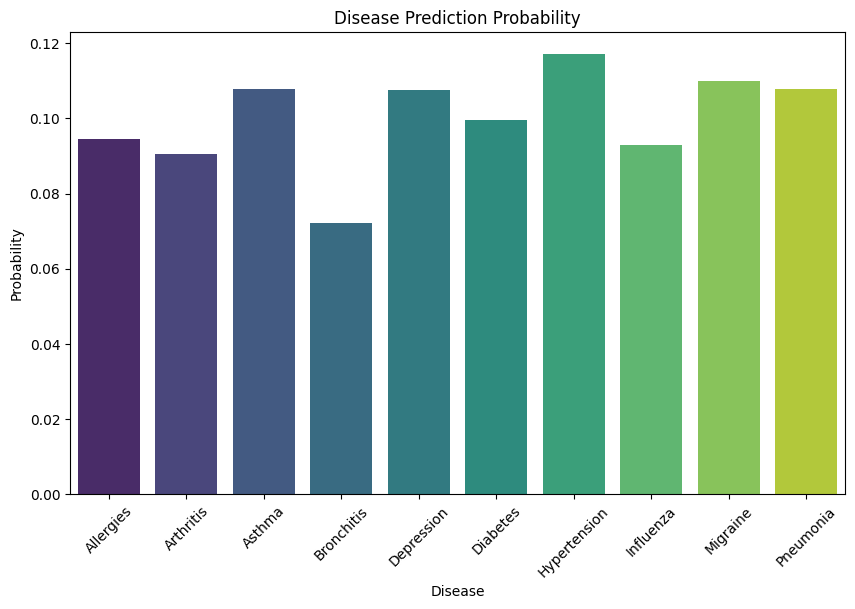

In [149]:
plt.figure(figsize=(10, 6))
sns.barplot(x=clf.classes_, y=probabilities[0], palette='viridis')
plt.title('Disease Prediction Probability')
plt.xlabel('Disease')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.show()

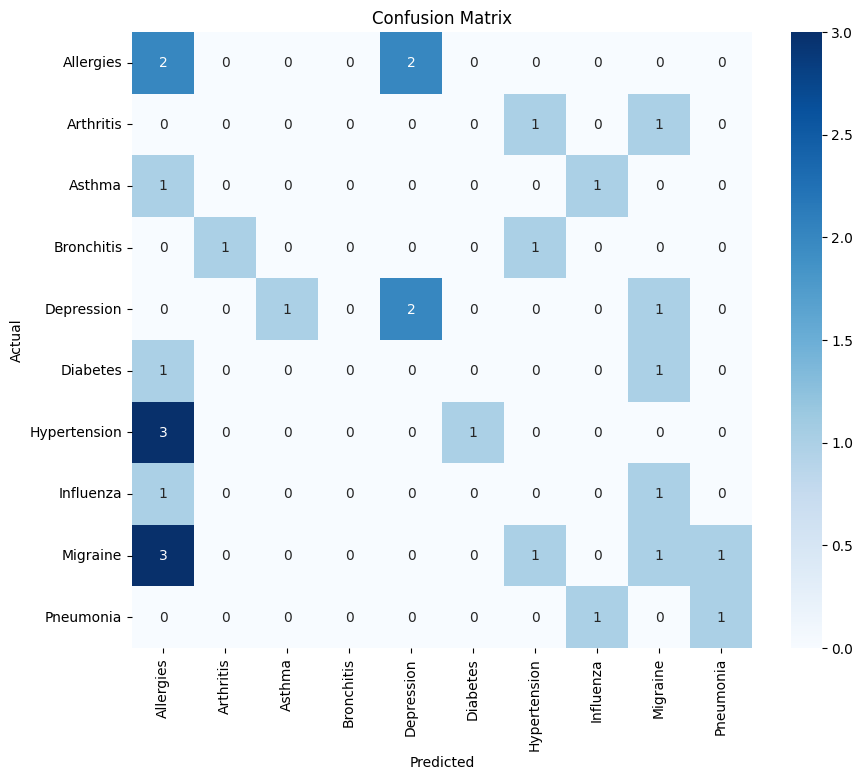

In [148]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [131]:
import numpy as np
def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(train_data)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

96 examples in training, 24 examples in testing.


In [132]:
label = 'Disease'
train_dtst = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_dtst = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

In [133]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [134]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"])

Use /tmp/tmpbwm1lom8 as temporary training directory


In [136]:
Diseases = [
    "Influenza",
    "Pneumonia",
    "Bronchitis",
    "Diabetes",
    "Hypertension",
    "Asthma",
    "Migraine",
    "Arthritis",
    "Allergies",
    "Depression",
    "Alzheimer's Disease",
    "Parkinson's Disease",
    "Cancer",
    "Stroke",
    "Heart Disease",
    "Chronic Obstructive Pulmonary Disease (COPD)",
    "Epilepsy",
    "Multiple Sclerosis",
    "Osteoporosis",
    "Fibromyalgia",
    "Chronic Kidney Disease",
    "Liver Disease",
    "Endometriosis",
    "Sleep Apnea",
    "Celiac Disease",
    "Crohn's Disease",
    "Ulcerative Colitis",
    "Rheumatoid Arthritis",
    "Gout"
]


In [137]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(Diseases)

In [138]:
from sklearn.naive_bayes import MultinomialNB

def predict_related_disease(new_disease):
    # Convert the new disease name into a numerical vector
    new_disease_vector = vectorizer.transform([new_disease])
    
    # Load the Multinomial Naive Bayes model
    clf = MultinomialNB()
    clf.fit(X, range(len(Diseases)))
    
    # Predict the label of the new disease vector
    label = clf.predict(new_disease_vector)
    
    # Return whether the new disease is related to any of the previous diseases
    return label != -1

In [139]:
new_disease = "Acute Bronchitis"
print(predict_related_disease(new_disease))

[ True]


In [140]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the datasets
train_df = pd.read_csv('/kaggle/input/finaldataset/patients_dataset.csv')
test_df = pd.read_csv('/kaggle/input/finaldataset/newdataset.csv')

# Preprocess the training data
X_train = train_df['Symptom']
y_train = train_df['Disease']

# Preprocess the testing data
X_test = test_df['Symptom']
y_test = test_df['Disease']

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train an SVM classifier
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train_vec, y_train)

# Test the SVM model
svm_y_pred = svm_clf.predict(X_test_vec)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)
svm_class_report = classification_report(y_test, svm_y_pred)

# Print results
print("Support Vector Machine (SVM) Classifier:")
print("Accuracy:", svm_accuracy * 100)
print("Confusion Matrix:\n", svm_conf_matrix)
print("Classification Report:\n", svm_class_report)


Support Vector Machine (SVM) Classifier:
Accuracy: 20.0
Confusion Matrix:
 [[2 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0]
 [1 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 1 0 0 0]
 [0 0 1 0 2 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 1 0]
 [3 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0]
 [3 0 0 0 0 0 1 0 1 1]
 [0 0 0 0 0 0 0 1 0 1]]
Classification Report:
               precision    recall  f1-score   support

   Allergies       0.18      0.50      0.27         4
   Arthritis       0.00      0.00      0.00         2
      Asthma       0.00      0.00      0.00         2
  Bronchitis       0.00      0.00      0.00         2
  Depression       0.50      0.50      0.50         4
    Diabetes       0.00      0.00      0.00         2
Hypertension       0.00      0.00      0.00         4
   Influenza       0.00      0.00      0.00         2
    Migraine       0.20      0.17      0.18         6
   Pneumonia       0.50      0.50      0.50         2

    accuracy                           0.20        30
   macro avg       0

In [141]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the datasets
train_df = pd.read_csv('/kaggle/input/finaldataset/patients_dataset.csv')
test_df = pd.read_csv('/kaggle/input/finaldataset/newdataset.csv')

# Preprocess the training data
X_train = train_df['Symptom']
y_train = train_df['Disease']

# Preprocess the testing data
X_test = test_df['Symptom']
y_test = test_df['Disease']

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train and evaluate Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_vec, y_train)
rf_y_pred = rf_clf.predict(X_test_vec)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
rf_class_report = classification_report(y_test, rf_y_pred)

# Train and evaluate Naive Bayes
nb_clf = MultinomialNB()
nb_clf.fit(X_train_vec, y_train)
nb_y_pred = nb_clf.predict(X_test_vec)
nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_conf_matrix = confusion_matrix(y_test, nb_y_pred)
nb_class_report = classification_report(y_test, nb_y_pred)

# Train and evaluate Logistic Regression
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
lr_clf.fit(X_train_vec, y_train)
lr_y_pred = lr_clf.predict(X_test_vec)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_conf_matrix = confusion_matrix(y_test, lr_y_pred)
lr_class_report = classification_report(y_test, lr_y_pred)

# Train and evaluate Support Vector Machine (SVM)
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train_vec, y_train)
svm_y_pred = svm_clf.predict(X_test_vec)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)
svm_class_report = classification_report(y_test, svm_y_pred)

# Train and evaluate k-Nearest Neighbors (KNN)
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_vec, y_train)
knn_y_pred = knn_clf.predict(X_test_vec)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)
knn_class_report = classification_report(y_test, knn_y_pred)

# Train and evaluate Decision Trees
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_vec, y_train)
dt_y_pred = dt_clf.predict(X_test_vec)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)
dt_class_report = classification_report(y_test, dt_y_pred)

# Print results
print("Random Forest Classifier:")
print("Accuracy:", rf_accuracy * 100)
print("Confusion Matrix:\n", rf_conf_matrix)
print("Classification Report:\n", rf_class_report)
print("\nNaive Bayes Classifier:")
print("Accuracy:", nb_accuracy * 100)
print("Confusion Matrix:\n", nb_conf_matrix)
print("Classification Report:\n", nb_class_report)
print("\nLogistic Regression Classifier:")
print("Accuracy:", lr_accuracy * 100)
print("Confusion Matrix:\n", lr_conf_matrix)
print("Classification Report:\n", lr_class_report)
print("\nSupport Vector Machine (SVM) Classifier:")
print("Accuracy:", svm_accuracy * 100)
print("Confusion Matrix:\n", svm_conf_matrix)
print("Classification Report:\n", svm_class_report)
print("\nk-Nearest Neighbors (KNN) Classifier:")
print("Accuracy:", knn_accuracy * 100)
print("Confusion Matrix:\n", knn_conf_matrix)
print("Classification Report:\n", knn_class_report)
print("\nDecision Tree Classifier:")
print("Accuracy:", dt_accuracy * 100)
print("Confusion Matrix:\n", dt_conf_matrix)
print("Classification Report:\n", dt_class_report)


Random Forest Classifier:
Accuracy: 6.666666666666667
Confusion Matrix:
 [[1 0 1 0 1 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 1 0]
 [1 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0]
 [0 0 2 0 1 0 0 0 0 1]
 [2 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 1 0 1]
 [0 1 0 0 0 0 0 0 1 0]
 [2 0 0 0 1 0 1 0 0 2]
 [0 0 0 0 0 1 0 0 1 0]]
Classification Report:
               precision    recall  f1-score   support

   Allergies       0.14      0.25      0.18         4
   Arthritis       0.00      0.00      0.00         2
      Asthma       0.00      0.00      0.00         2
  Bronchitis       0.00      0.00      0.00         2
  Depression       0.33      0.25      0.29         4
    Diabetes       0.00      0.00      0.00         2
Hypertension       0.00      0.00      0.00         4
   Influenza       0.00      0.00      0.00         2
    Migraine       0.00      0.00      0.00         6
   Pneumonia       0.00      0.00      0.00         2

    accuracy                           0.07        30
   macro avg       0.0

In [142]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the datasets
train_df = pd.read_csv('/kaggle/input/finaldataset/patients_dataset.csv')
test_df = pd.read_csv('/kaggle/input/finaldataset/newdataset.csv')

# Preprocess the training data
X_train = train_df['Symptom']
y_train = train_df['Disease']

# Preprocess the testing data
X_test = test_df['Symptom']
y_test = test_df['Disease']

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_vec, y_train)
    y_pred = clf.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print results
for name, accuracy in results.items():
    print(f"{name}: {accuracy * 100:.2f}%")


Random Forest: 6.67%
Naive Bayes: 13.33%
Logistic Regression: 16.67%
Support Vector Machine: 20.00%
k-Nearest Neighbors: 6.67%
Decision Tree: 10.00%


In [146]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the datasets
train_df = pd.read_csv('/kaggle/input/finaldataset/patients_dataset.csv')
test_df = pd.read_csv('/kaggle/input/finaldataset/newdataset.csv')

# Preprocess the training data
X_train = train_df['Symptom']
y_train = train_df['Disease']

# Preprocess the testing data
X_test = test_df['Symptom']
y_test = test_df['Disease']

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Support Vector Machine classifier
clf = SVC(kernel='linear', probability=True)  # Use linear kernel for SVM
clf.fit(X_train_vec, y_train)

# Test the model
y_pred = clf.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy * 100)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Model Accuracy: 20.0
Confusion Matrix:
 [[2 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0]
 [1 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 1 0 0 0]
 [0 0 1 0 2 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 1 0]
 [3 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0]
 [3 0 0 0 0 0 1 0 1 1]
 [0 0 0 0 0 0 0 1 0 1]]
Classification Report:
               precision    recall  f1-score   support

   Allergies       0.18      0.50      0.27         4
   Arthritis       0.00      0.00      0.00         2
      Asthma       0.00      0.00      0.00         2
  Bronchitis       0.00      0.00      0.00         2
  Depression       0.50      0.50      0.50         4
    Diabetes       0.00      0.00      0.00         2
Hypertension       0.00      0.00      0.00         4
   Influenza       0.00      0.00      0.00         2
    Migraine       0.20      0.17      0.18         6
   Pneumonia       0.50      0.50      0.50         2

    accuracy                           0.20        30
   macro avg       0.14      0.17      0.14        30
w

In [147]:
# Prompt for new disease input by user
new_symptoms = input("Enter new symptoms: ")

# Predict if new disease is related to previous diseases
predicted_disease = clf.predict(vectorizer.transform([new_symptoms]))[0]

# Calculate the probability of previous disease linked to current disease
probabilities = clf.predict_proba(vectorizer.transform([new_symptoms]))
previous_disease_prob = probabilities[0][list(clf.classes_).index(predicted_disease)]

print("Predicted Disease:", predicted_disease)
print("Probability of Previous Disease Linked to Current Disease:", previous_disease_prob)

Enter new symptoms:  headache


Predicted Disease: Hypertension
Probability of Previous Disease Linked to Current Disease: 0.11708626010993001
